In [18]:
import pandas as pd
df = pd.read_csv("merged.csv")

In [20]:
import pandas as pd
import sqlite3
import json

# 📂 Fayl manzillari
client_csv = "client_info.csv"
financials_sql = "financials.sql"
risk_json = "credit_risk.json"

# 1️⃣ CLIENT INFO (CSV)
client_info = pd.read_csv(client_csv)
print("✅ client_info.csv o‘qildi:", client_info.shape)

# 2️⃣ FINANCIALS (SQL)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

with open(financials_sql, "r", encoding="utf-8") as f:
    sql_script = f.read()
cursor.executescript(sql_script)

financials = pd.read_sql_query("SELECT * FROM financials", conn)
conn.close()
print("✅ financials.sql o‘qildi:", financials.shape)

# 3️⃣ CREDIT RISK (JSON)
with open(risk_json, "r", encoding="utf-8") as f:
    risk_data = json.load(f)
credit_risk = pd.DataFrame(risk_data)
print("✅ credit_risk.json o‘qildi:", credit_risk.shape)

# 4️⃣ BIRLASHTIRISH (JOIN)
merged_df = (
    client_info
    .merge(financials, on="client_id", how="inner")
    .merge(credit_risk, on="client_id", how="inner")
)

print("\n📊 Umumiy dataset shakli:", merged_df.shape)
print("Ustunlar:", list(merged_df.columns))

# 5️⃣ Bir nechta satrni ko‘rish
print("\n🧾 Namuna ma’lumotlar:")
print(merged_df.head())

# 💾 Xohlasa saqlash
merged_df.to_csv("credit_scoring_full.csv", index=False)
print("\n💾 Saqlandi: credit_scoring_full.csv")


✅ client_info.csv o‘qildi: (2000, 8)
✅ financials.sql o‘qildi: (2000, 7)
✅ credit_risk.json o‘qildi: (2000, 4)

📊 Umumiy dataset shakli: (2000, 17)
Ustunlar: ['client_id', 'full_name', 'age', 'gender', 'marital_status', 'region', 'education_level', 'employment_years', 'income', 'credit_score', 'loan_amount', 'past_due', 'monthly_expenses', 'savings_balance', 'risk_score', 'risk_level', 'approve_credit']

🧾 Namuna ma’lumotlar:
   client_id full_name  age  gender marital_status     region education_level  \
0          1  Client_1   59    male         single    Andijan     high_school   
1          2  Client_2   49    male        widowed    Andijan     high_school   
2          3  Client_3   35    male        widowed  Samarkand     high_school   
3          4  Client_4   63    male         single    Andijan     high_school   
4          5  Client_5   28  female        married   Tashkent     high_school   

   employment_years   income  credit_score  loan_amount  past_due  \
0             

In [22]:
df.describe()

,Unnamed: 0,client_id,age,employment_years,risk_score,risk_level,approve_credit,income,credit_score,loan_amount,past_due,monthly_expenses,savings_balance
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,999.500000,1000.500000,42.694000,17.123500,86.138308,1.500000,0.750000,6968.966530,679.243000,11745.452690,2.477500,2795.771125,10432.74200
std,577.494589,577.494589,12.614195,9.968848,43.702833,1.118314,0.433121,1511.792696,87.588526,3818.778795,1.163258,1032.381142,4680.96695
min,0.000000,1.000000,21.000000,0.000000,0.110000,0.000000,0.000000,1861.310000,377.000000,2503.980000,0.000000,461.320000,1446.88000
25%,499.750000,500.750000,32.000000,8.750000,55.076000,0.750000,0.750000,5927.367500,621.000000,8947.355000,2.000000,1982.712500,6644.35500
50%,999.500000,1000.500000,43.000000,17.000000,85.459000,1.500000,1.000000,7002.995000,680.500000,11385.070000,2.000000,2671.610000,9836.03000
75%,1499.250000,1500.250000,54.000000,26.000000,115.074250,2.250000,1.000000,8004.932500,741.250000,14031.482500,3.000000,3512.672500,13744.71250
max,1999.000000,2000.000000,64.000000,34.000000,236.911000,3.000000,1.000000,11813.150000,850.000000,34094.140000,6.000000,6389.240000,26033.59000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2000 non-null   int64  
 1   client_id         2000 non-null   int64  
 2   full_name         2000 non-null   object 
 3   age               2000 non-null   int64  
 4   gender            2000 non-null   object 
 5   marital_status    2000 non-null   object 
 6   region            2000 non-null   object 
 7   education_level   2000 non-null   object 
 8   employment_years  2000 non-null   int64  
 9   risk_score        2000 non-null   float64
 10  risk_level        2000 non-null   int64  
 11  approve_credit    2000 non-null   int64  
 12  income            2000 non-null   float64
 13  credit_score      2000 non-null   int64  
 14  loan_amount       2000 non-null   float64
 15  past_due          2000 non-null   int64  
 16  monthly_expenses  2000 non-null   float64


In [24]:
df.isnull().sum()

Unnamed: 0          0
client_id           0
full_name           0
age                 0
gender              0
marital_status      0
region              0
education_level     0
employment_years    0
risk_score          0
risk_level          0
approve_credit      0
income              0
credit_score        0
loan_amount         0
past_due            0
monthly_expenses    0
savings_balance     0
dtype: int64

In [25]:
df.drop(['full_name','credit_score'],axis=1,inplace=True)
df

,Unnamed: 0,client_id,age,gender,marital_status,region,education_level,employment_years,risk_score,risk_level,approve_credit,income,loan_amount,past_due,monthly_expenses,savings_balance
0,0,1,59,male,single,Andijan,high_school,8,39.063,0,1,6751.41,7313.60,1,3968.91,3906.33
1,1,2,49,male,widowed,Andijan,high_school,27,111.792,2,1,6667.90,13648.15,2,2094.24,11396.77
2,2,3,35,male,widowed,Samarkand,high_school,22,48.099,0,1,7551.83,8053.81,1,1922.36,14182.23
3,3,4,63,male,single,Andijan,high_school,21,72.197,1,1,6345.03,12914.76,4,3195.50,3431.10
4,4,5,28,female,married,Tashkent,high_school,23,168.171,3,0,7265.29,18429.49,3,4154.77,15894.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,54,female,married,Namangan,high_school,24,70.941,1,1,5871.09,12002.73,1,2262.00,6195.38
1996,1996,1997,38,male,divorced,Samarkand,bachelor,22,68.347,1,1,9550.29,19256.68,2,5277.49,17131.53
1997,1997,1998,33,male,widowed,Bukhara,high_school,11,101.010,2,1,8237.24,9992.30,4,4624.24,4376.01
1998,1998,1999,61,female,widowed,Samarkand,master,12,108.932,2,1,5763.05,8002.85,3,2672.44,4958.95


In [26]:
df.gender.unique()

array(['male', 'female'], dtype=object)

In [27]:
df.marital_status.unique()

array(['single', 'widowed', 'married', 'divorced'], dtype=object)

      region  count       mean   median        std
2   Namangan    404  89.735129  89.1680  44.060461
0    Andijan    400  87.743288  88.8660  40.662443
3  Samarkand    424  86.049580  83.9375  44.685086
1    Bukhara    384  84.003326  83.2415  45.554345
4   Tashkent    388  82.948482  83.1460  43.267798


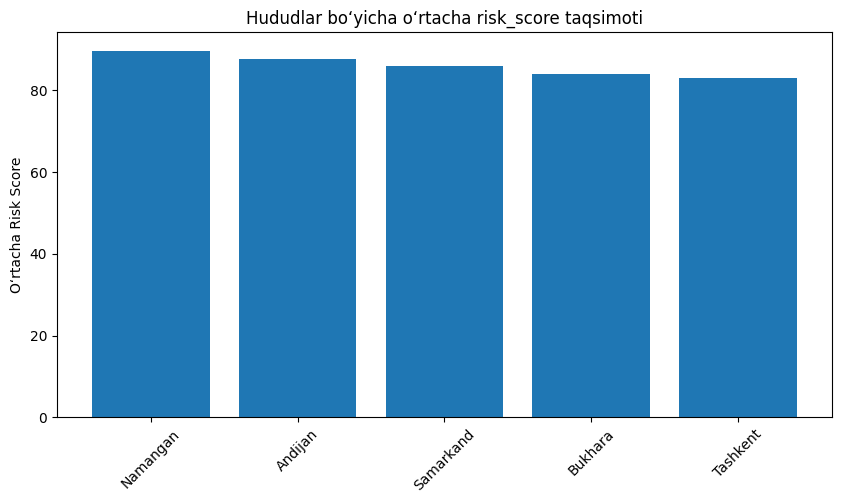

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Region bo‘yicha risk score tahlili
region_risk = merged_df.groupby('region')['risk_score'].agg(['count', 'mean', 'median', 'std']).reset_index()
region_risk = region_risk.sort_values('mean', ascending=False)

print(region_risk)

# Vizualizatsiya
plt.figure(figsize=(10,5))
plt.bar(region_risk['region'], region_risk['mean'])
plt.xticks(rotation=45)
plt.ylabel('O‘rtacha Risk Score')
plt.title('Hududlar bo‘yicha o‘rtacha risk_score taqsimoti')
plt.show()


In [29]:
df.education_level.unique()

array(['high_school', 'bachelor', 'master', 'phd'], dtype=object)

  marital_status  count       mean   median        std
0       divorced    509  88.428766  87.3910  43.386588
2         single    516  86.239283  84.0015  44.019125
1        married    487  84.943598  84.6210  43.867834
3        widowed    488  84.834781  86.0205  43.566589


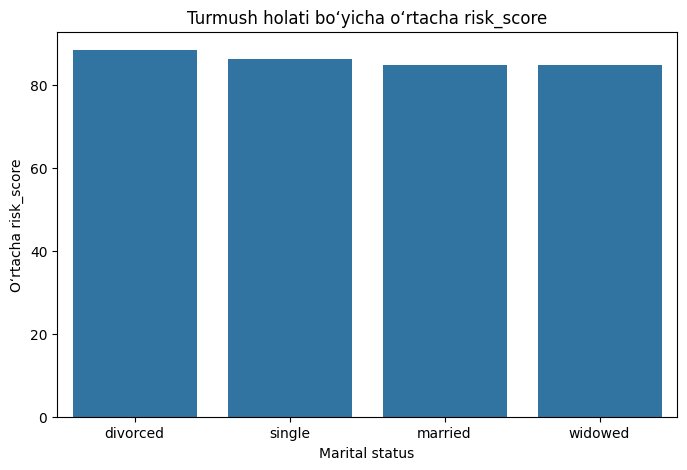

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Marital status bo‘yicha risk_score tahlili
status_risk = merged_df.groupby('marital_status')['risk_score'].agg(['count', 'mean', 'median', 'std']).reset_index()
status_risk = status_risk.sort_values('mean', ascending=False)

print(status_risk)

# Vizualizatsiya (barplot)
plt.figure(figsize=(8,5))
sns.barplot(data=status_risk, x='marital_status', y='mean')
plt.title('Turmush holati bo‘yicha o‘rtacha risk_score')
plt.ylabel('O‘rtacha risk_score')
plt.xlabel('Marital status')
plt.show()

In [35]:
df.corr(numeric_only=True)

,Unnamed: 0,client_id,age,employment_years,risk_score,risk_level,approve_credit,income,loan_amount,past_due,monthly_expenses,savings_balance
Unnamed: 0,1.000000,1.000000,-0.002862,-0.007597,0.012334,0.011503,-0.020044,-0.024847,-0.013328,0.009099,-0.005732,-0.011232
client_id,1.000000,1.000000,-0.002862,-0.007597,0.012334,0.011503,-0.020044,-0.024847,-0.013328,0.009099,-0.005732,-0.011232
age,-0.002862,-0.002862,1.000000,-0.004258,0.004657,-0.001277,0.003479,0.025642,0.013961,-0.006061,0.005955,-0.005802
employment_years,-0.007597,-0.007597,-0.004258,1.000000,0.051763,0.044177,-0.042434,-0.005064,0.016648,0.042494,0.016313,0.000694
risk_score,0.012334,0.012334,0.004657,0.051763,1.000000,0.935183,-0.744994,-0.026500,0.391620,0.491362,-0.013648,-0.026266
risk_level,0.011503,0.011503,-0.001277,0.044177,0.935183,1.000000,-0.774597,-0.036204,0.352359,0.447803,-0.012803,-0.019905
approve_credit,-0.020044,-0.020044,0.003479,-0.042434,-0.744994,-0.774597,1.000000,-0.008004,-0.337431,-0.346767,-0.007116,-0.003131
income,-0.024847,-0.024847,0.025642,-0.005064,-0.026500,-0.036204,-0.008004,1.000000,0.674558,-0.007323,0.599146,0.465884
loan_amount,-0.013328,-0.013328,0.013961,0.016648,0.391620,0.352359,-0.337431,0.674558,1.000000,0.181632,0.419000,0.319689
past_due,0.009099,0.009099,-0.006061,0.042494,0.491362,0.447803,-0.346767,-0.007323,0.181632,1.000000,-0.002824,-0.008156


  education_level  count       mean   median        std
3             phd     91  92.036154  95.4130  40.057482
0        bachelor    720  87.811761  88.5985  44.367214
2          master    379  86.434427  87.6560  43.878177
1     high_school    810  83.849643  83.1180  43.360346


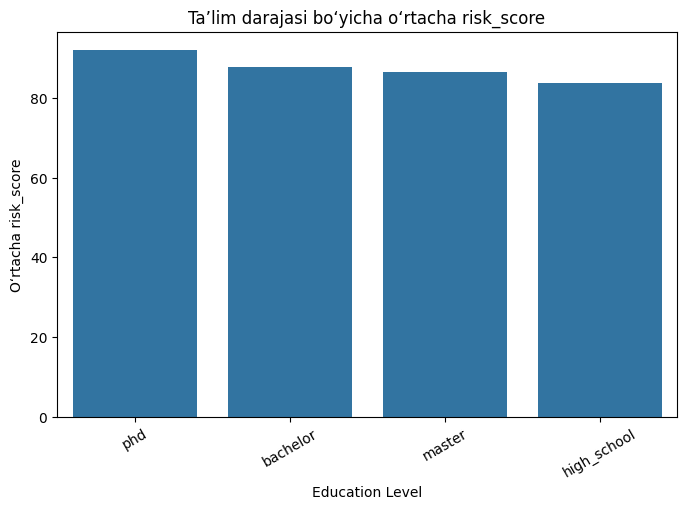

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ta’lim darajasi bo‘yicha risk_score tahlili
edu_risk = merged_df.groupby('education_level')['risk_score'].agg(['count', 'mean', 'median', 'std']).reset_index()
edu_risk = edu_risk.sort_values('mean', ascending=False)

print(edu_risk)

# Barplot (o‘rtacha risk score)
plt.figure(figsize=(8,5))
sns.barplot(data=edu_risk, x='education_level', y='mean')
plt.title('Ta’lim darajasi bo‘yicha o‘rtacha risk_score')
plt.ylabel('O‘rtacha risk_score')
plt.xlabel('Education Level')
plt.xticks(rotation=30)
plt.show()


In [37]:
region_mapping = {
    'Tashkent': 0,
    'Bukhara': 1,
    'Samarkand': 2,
    'Andijan': 3,
    'Namangan': 4
}
merged_df['region_encoded'] = merged_df['region'].map(region_mapping)

marital_mapping = {
    'widowed': 0,
    'married': 1,
    'single': 2,
    'divorced': 3
}
merged_df['marital_encoded'] = merged_df['marital_status'].map(marital_mapping)
education_mapping = {
    'high_school': 0,
    'master': 1,
    'bachelor': 2,
    'phd': 3
}
merged_df['education_encoded'] = merged_df['education_level'].map(education_mapping)


In [38]:
merged_df.drop(['region', 'marital_status', 'education_level'], axis=1, inplace=True)
df = merged_df

In [39]:
df

,client_id,full_name,age,gender,employment_years,income,credit_score,loan_amount,past_due,monthly_expenses,savings_balance,risk_score,risk_level,approve_credit,region_encoded,marital_encoded,education_encoded
0,1,Client_1,59,male,8,6751.41,773,7313.60,1,3968.91,3906.33,39.063,0,1,3,2,0
1,2,Client_2,49,male,27,6667.90,628,13648.15,2,2094.24,11396.77,111.792,2,1,3,0,0
2,3,Client_3,35,male,22,7551.83,756,8053.81,1,1922.36,14182.23,48.099,0,1,2,0,0
3,4,Client_4,63,male,21,6345.03,706,12914.76,4,3195.50,3431.10,72.197,1,1,3,2,0
4,5,Client_5,28,female,23,7265.29,515,18429.49,3,4154.77,15894.40,168.171,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Client_1996,54,female,24,5871.09,710,12002.73,1,2262.00,6195.38,70.941,1,1,4,1,0
1996,1997,Client_1997,38,male,22,9550.29,715,19256.68,2,5277.49,17131.53,68.347,1,1,2,3,2
1997,1998,Client_1998,33,male,11,8237.24,649,9992.30,4,4624.24,4376.01,101.010,2,1,1,0,0
1998,1999,Client_1999,61,female,12,5763.05,634,8002.85,3,2672.44,4958.95,108.932,2,1,2,0,1


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
df.gender = LabelEncoder().fit_transform(df.gender)

In [43]:
import pandas as pd

# Nusxa olish (xavfsizlik uchun)
df_clean = merged_df.copy()

# Sonli ustunlar
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Har bir sonli ustun bo‘yicha outlierlarni tozalash (IQR usuli)
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlierlarni filtrdan chiqaramiz
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Outlier tozalangandan keyin qoldi: {df_clean.shape[0]} ta satr")


Outlier tozalangandan keyin qoldi: 1389 ta satr


In [44]:
import pandas as pd

# Ishchi nusxa
df_clean = merged_df.copy()

# Outlier tekshiriladigan ustunlar
cols_to_clean = ['income', 'loan_amount', 'monthly_expenses', 'savings_balance', 'age','employment_years']

for col in cols_to_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlierlarni chiqarib tashlash
    before = df_clean.shape[0]
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    after = df_clean.shape[0]
    
    print(f"{col}: {before - after} ta outlier olib tashlandi ({round((before - after)/before*100, 2)}%)")

print(f"\nYakuniy satrlar soni: {df_clean.shape[0]}")


income: 11 ta outlier olib tashlandi (0.55%)
loan_amount: 21 ta outlier olib tashlandi (1.06%)
monthly_expenses: 3 ta outlier olib tashlandi (0.15%)
savings_balance: 2 ta outlier olib tashlandi (0.1%)
age: 0 ta outlier olib tashlandi (0.0%)
employment_years: 0 ta outlier olib tashlandi (0.0%)

Yakuniy satrlar soni: 1963


In [45]:
df_clean

,client_id,full_name,age,gender,employment_years,income,credit_score,loan_amount,past_due,monthly_expenses,savings_balance,risk_score,risk_level,approve_credit,region_encoded,marital_encoded,education_encoded
0,1,Client_1,59,1,8,6751.41,773,7313.60,1,3968.91,3906.33,39.063,0,1,3,2,0
1,2,Client_2,49,1,27,6667.90,628,13648.15,2,2094.24,11396.77,111.792,2,1,3,0,0
2,3,Client_3,35,1,22,7551.83,756,8053.81,1,1922.36,14182.23,48.099,0,1,2,0,0
3,4,Client_4,63,1,21,6345.03,706,12914.76,4,3195.50,3431.10,72.197,1,1,3,2,0
4,5,Client_5,28,0,23,7265.29,515,18429.49,3,4154.77,15894.40,168.171,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Client_1996,54,0,24,5871.09,710,12002.73,1,2262.00,6195.38,70.941,1,1,4,1,0
1996,1997,Client_1997,38,1,22,9550.29,715,19256.68,2,5277.49,17131.53,68.347,1,1,2,3,2
1997,1998,Client_1998,33,1,11,8237.24,649,9992.30,4,4624.24,4376.01,101.010,2,1,1,0,0
1998,1999,Client_1999,61,0,12,5763.05,634,8002.85,3,2672.44,4958.95,108.932,2,1,2,0,1


In [46]:
df = df_clean[['client_id', 'age', 'gender', 'employment_years', 'income',
       'loan_amount', 'past_due', 'monthly_expenses', 'savings_balance', 'region_encoded',
       'marital_encoded', 'education_encoded',
       'risk_score', 'risk_level', 'approve_credit']]

In [47]:
import numpy as np

df_fe = df.copy()

# --- Financial ratios ---
df_fe['debt_to_income'] = df_fe['loan_amount'] / (df_fe['income'] + 1)
df_fe['expense_to_income'] = df_fe['monthly_expenses'] / (df_fe['income'] + 1)
df_fe['savings_to_income'] = df_fe['savings_balance'] / (df_fe['income'] + 1)
df_fe['loan_to_savings'] = df_fe['loan_amount'] / (df_fe['savings_balance'] + 1)
df_fe['income_per_year'] = df_fe['income'] / (df_fe['employment_years'] + 1)

# --- Demographics ---
df_fe['is_young'] = (df_fe['age'] < 30).astype(int)
df_fe['is_senior'] = (df_fe['age'] > 55).astype(int)
df_fe['work_stability'] = df_fe['employment_years'] / (df_fe['age'] + 1)

# --- Interactions ---
df_fe['income_loan_ratio'] = df_fe['income'] / (df_fe['loan_amount'] + 1)
df_fe['disposable_income'] = df_fe['income'] - df_fe['monthly_expenses']
df_fe['saving_capacity'] = df_fe['savings_balance'] + df_fe['disposable_income']
df_fe['credit_burden'] = (df_fe['loan_amount'] + df_fe['monthly_expenses']) / (df_fe['income'] + df_fe['savings_balance'] + 1)

# --- Transformations ---
for col in ['income', 'loan_amount', 'savings_balance']:
    df_fe[f'{col}_log'] = np.log1p(df_fe[col])


In [48]:
df_fe.drop('client_id',axis=1,inplace=True)

In [49]:
df_fe

,age,gender,employment_years,income,loan_amount,past_due,monthly_expenses,savings_balance,region_encoded,marital_encoded,...,is_young,is_senior,work_stability,income_loan_ratio,disposable_income,saving_capacity,credit_burden,income_log,loan_amount_log,savings_balance_log
0,59,1,8,6751.41,7313.60,1,3968.91,3906.33,3,2,...,0,1,0.133333,0.923005,2782.50,6688.83,1.058522,8.817655,8.897628,8.270610
1,49,1,27,6667.90,13648.15,2,2094.24,11396.77,3,0,...,0,0,0.540000,0.488521,4573.66,15970.43,0.871398,8.805210,9.521433,9.341173
2,35,1,22,7551.83,8053.81,1,1922.36,14182.23,2,0,...,0,0,0.611111,0.937555,5629.47,19811.70,0.458990,8.929678,8.994025,9.559816
3,63,1,21,6345.03,12914.76,4,3195.50,3431.10,3,2,...,0,1,0.328125,0.491263,3149.53,6580.63,1.647749,8.755585,9.466204,8.140928
4,28,0,23,7265.29,18429.49,3,4154.77,15894.40,0,1,...,1,0,0.793103,0.394200,3110.52,19004.92,0.975112,8.891001,9.821762,9.673785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,54,0,24,5871.09,12002.73,1,2262.00,6195.38,4,1,...,0,0,0.436364,0.489105,3609.09,9804.47,1.182081,8.677966,9.392973,8.731721
1996,38,1,22,9550.29,19256.68,2,5277.49,17131.53,2,3,...,0,0,0.564103,0.495921,4272.80,21404.33,0.919474,9.164432,9.865665,9.748734
1997,33,1,11,8237.24,9992.30,4,4624.24,4376.01,1,0,...,0,0,0.323529,0.824276,3613.00,7989.01,1.158732,9.016542,9.209670,8.384121
1998,61,0,12,5763.05,8002.85,3,2672.44,4958.95,2,0,...,0,1,0.193548,0.720035,3090.61,8049.56,0.995551,8.659396,8.987678,8.509151


In [50]:
import pandas as pd

# Faqat yangi yaratilgan feature'lar
new_features = [
    'debt_to_income', 'expense_to_income', 'savings_to_income', 'loan_to_savings',
    'income_per_year', 'is_young', 'is_senior', 'work_stability',
    'income_loan_ratio', 'disposable_income', 'saving_capacity', 'credit_burden',
    'income_log', 'loan_amount_log', 'savings_balance_log'
]

# Korelatsiya matritsasi (faqat risk_score bilan)
corrs = df_fe[new_features + ['risk_score']].corr()['risk_score'].sort_values(ascending=False)
print(corrs)


risk_score             1.000000
debt_to_income         0.540321
loan_amount_log        0.348590
credit_burden          0.330892
loan_to_savings        0.245755
work_stability         0.036150
is_senior              0.006563
expense_to_income     -0.006949
is_young              -0.008328
savings_to_income     -0.015800
income_per_year       -0.023240
disposable_income     -0.035684
savings_balance_log   -0.038628
saving_capacity       -0.041470
income_log            -0.049968
income_loan_ratio     -0.518669
Name: risk_score, dtype: float64


In [51]:
old_features = [
    'age', 'gender', 'employment_years', 'income', 'loan_amount',
    'past_due', 'monthly_expenses', 'savings_balance',
    'region_encoded', 'marital_encoded', 'education_encoded'
]

corr_old = df[old_features + ['risk_score']].corr()['risk_score'].sort_values(ascending=False)
print(corr_old)


risk_score           1.000000
past_due             0.486787
loan_amount          0.357080
region_encoded       0.063498
employment_years     0.047859
education_encoded    0.042444
marital_encoded      0.035461
age                  0.005602
gender              -0.022650
monthly_expenses    -0.032244
savings_balance     -0.036749
income              -0.051596
Name: risk_score, dtype: float64


In [52]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd

# Maqsadli ustun
y = df_fe['approve_credit']

# Target bilan bog‘liq ustunlarni olib tashlaymiz
X = df_fe.drop(['approve_credit', 'risk_score', 'risk_level'], axis=1)

# Train-test ajratish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model yaratish
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

# Bashorat va AUC
y_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"✅ Model ROC-AUC: {auc:.3f}")


[LightGBM] [Info] Number of positive: 1187, number of negative: 383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4441
[LightGBM] [Info] Number of data points in the train set: 1570, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756051 -> initscore=1.131149
[LightGBM] [Info] Start training from score 1.131149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

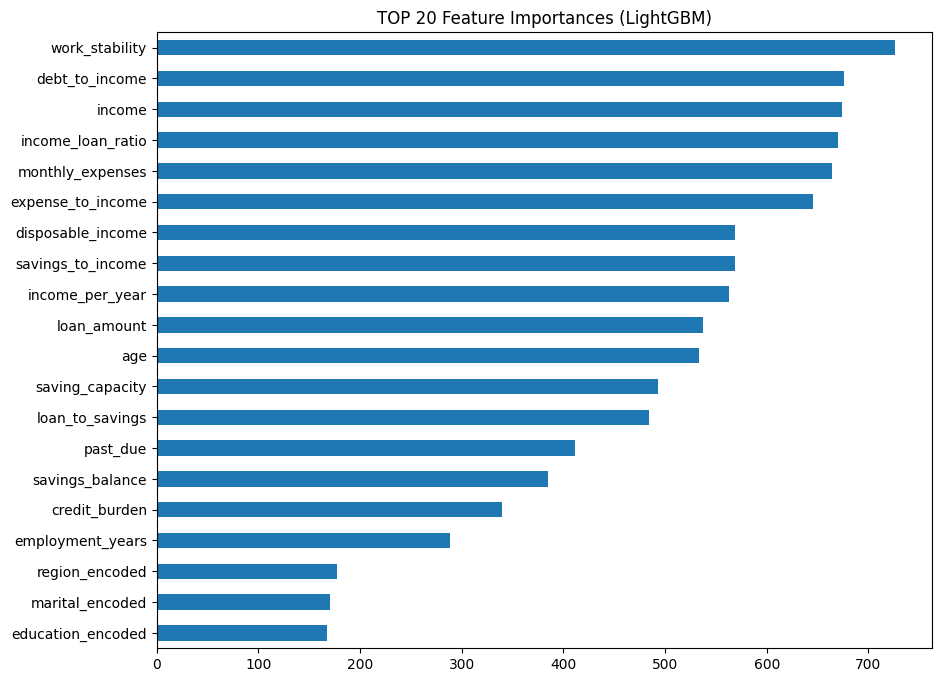

work_stability         726
debt_to_income         676
income                 674
income_loan_ratio      670
monthly_expenses       664
expense_to_income      646
disposable_income      569
savings_to_income      569
income_per_year        563
loan_amount            537
age                    533
saving_capacity        493
loan_to_savings        484
past_due               411
savings_balance        385
credit_burden          340
employment_years       288
region_encoded         177
marital_encoded        170
education_encoded      167
gender                  93
is_young                 3
is_senior                1
income_log               0
loan_amount_log          0
savings_balance_log      0
dtype: int32


In [53]:
import matplotlib.pyplot as plt

# Feature importance olish
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,8))
importances.head(20).plot(kind='barh')
plt.title('TOP 20 Feature Importances (LightGBM)')
plt.gca().invert_yaxis()
plt.show()

print(importances.head(30))


In [54]:
features = [
    'work_stability', 'debt_to_income', 'income', 'income_loan_ratio',
    'monthly_expenses', 'expense_to_income', 'savings_to_income',
    'disposable_income', 'income_per_year', 'loan_amount', 'age',
    'saving_capacity', 'loan_to_savings', 'past_due', 'savings_balance',
    'credit_burden'
]

X = df_fe[features]
y = df_fe['approve_credit']


In [55]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

def objective(trial):
    # Parametrlarni Optuna tanlaydi
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 15, 255),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': 42,
        'n_jobs': -1
    }

    model = LGBMClassifier(**param)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return np.mean(auc_scores)

# Optuna obyektini yaratamiz
study = optuna.create_study(direction='maximize', study_name="LGBM_Optuna")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("🏆 Eng yaxshi parametrlar:")
print(study.best_params)
print(f"✅ Eng yaxshi ROC-AUC: {study.best_value:.4f}")

[I 2025-12-07 10:26:21,494] A new study created in memory with name: LGBM_Optuna


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-07 10:26:35,791] Trial 0 finished with value: 0.8009089267696723 and parameters: {'learning_rate': 0.013178278370633232, 'num_leaves': 38, 'max_depth': 4, 'n_estimators': 916, 'min_child_samples': 50, 'subsample': 0.9192590390794194, 'colsample_bytree': 0.9663608825876825, 'reg_alpha': 3.4716681543126036e-08, 'reg_lambda': 0.6900953420376752}. Best is trial 0 with value: 0.8009089267696723.
[I 2025-12-07 10:26:42,982] Trial 1 finished with value: 0.7981742325958334 and parameters: {'learning_rate': 0.010541220667729804, 'num_leaves': 221, 'max_depth': 9, 'n_estimators': 758, 'min_child_samples': 70, 'subsample': 0.7450981456857605, 'colsample_bytree': 0.6290679658073773, 'reg_alpha': 0.006866675869038824, 'reg_lambda': 1.575605323732548}. Best is trial 0 with value: 0.8009089267696723.
[I 2025-12-07 10:26:53,508] Trial 2 finished with value: 0.7795683796835113 and parameters: {'learning_rate': 0.02211566377873156, 'num_leaves': 75, 'max_depth': 10, 'n_estimators': 949, 'min_

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = study.best_params
best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1187, number of negative: 383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3622
[LightGBM] [Info] Number of data points in the train set: 1570, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756051 -> initscore=1.131149
[LightGBM] [Info] Start training from score 1.131149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

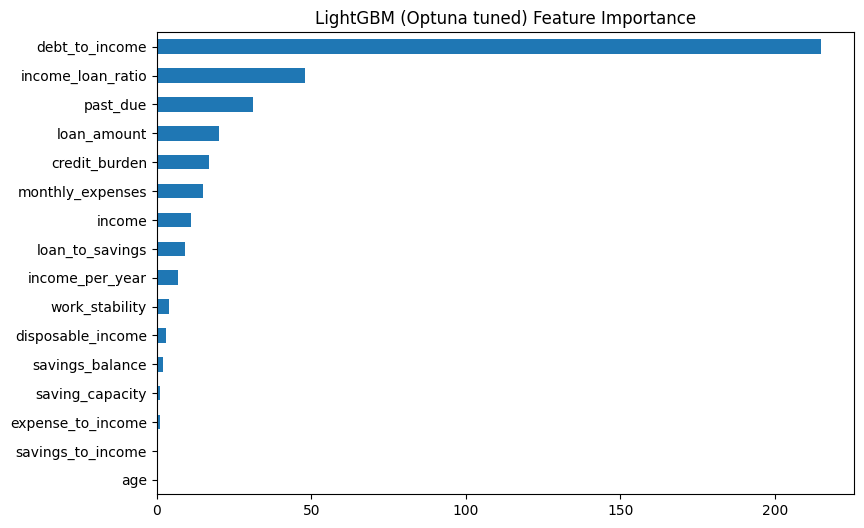

debt_to_income       215
income_loan_ratio     48
past_due              31
loan_amount           20
credit_burden         17
monthly_expenses      15
income                11
loan_to_savings        9
income_per_year        7
work_stability         4
dtype: int32


In [58]:
import matplotlib.pyplot as plt
import pandas as pd

importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(9,6))
importance.plot(kind='barh')
plt.title("LightGBM (Optuna tuned) Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print(importance.head(10))


✅ Approve (1): 1484
❌ Reject (0): 479
🔸 Ratio: 0.756 (ya’ni 75.6% 1-lar)


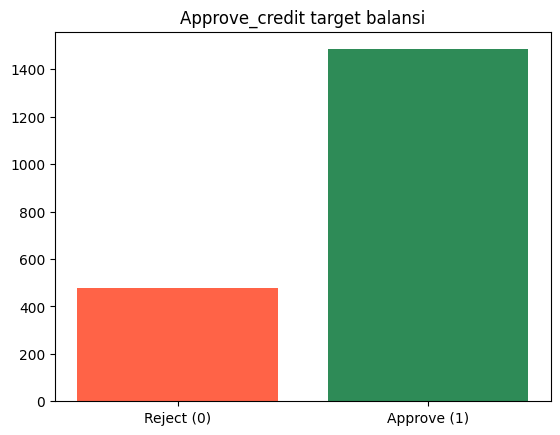

In [59]:
import matplotlib.pyplot as plt

count_1 = df_fe['approve_credit'].sum()
count_0 = len(df_fe) - count_1
ratio = count_1 / len(df_fe)

print(f"✅ Approve (1): {count_1}")
print(f"❌ Reject (0): {count_0}")
print(f"🔸 Ratio: {ratio:.3f} (ya’ni {ratio*100:.1f}% 1-lar)")

plt.bar(['Reject (0)', 'Approve (1)'], [count_0, count_1], color=['tomato', 'seagreen'])
plt.title('Approve_credit target balansi')
plt.show()


In [60]:
import optuna
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# === 1️⃣ Ma'lumotlar tayyorlash ===

features = [
    'work_stability', 'debt_to_income', 'income', 'income_loan_ratio',
    'monthly_expenses', 'expense_to_income', 'savings_to_income',
    'disposable_income', 'income_per_year', 'loan_amount', 'age',
    'saving_capacity', 'loan_to_savings', 'past_due', 'savings_balance',
    'credit_burden'
]

X = df_fe[features]
y = df_fe['approve_credit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 2️⃣ Disbalance ni hisoblash ===
count_1 = y_train.sum()
count_0 = len(y_train) - count_1
scale_pos_weight = count_0 / count_1  # Bu muvozanat koeffitsienti
print(f"📊 Class ratio: 1:{count_1/count_0:.2f}, scale_pos_weight={scale_pos_weight:.3f}")

# === 3️⃣ Optuna objective funksiyasi ===
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 127),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 60),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 5.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 5.0, log=True),
        'scale_pos_weight': scale_pos_weight,  # bu yerda endi mavjud ✅
        'random_state': 42,
        'n_jobs': -1
    }

    model = LGBMClassifier(**param)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    return np.mean(auc)

# === 4️⃣ Optuna study yaratish va tuning ===
study = optuna.create_study(direction='maximize', study_name="LightGBM_Balanced")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("🏆 Eng yaxshi parametrlar:")
print(study.best_params)
print(f"✅ Eng yaxshi ROC-AUC: {study.best_value:.4f}")

# === 5️⃣ Yakuniy modelni train/test qilish ===
best_params = study.best_params
model = LGBMClassifier(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(f"\nROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

[I 2025-12-07 10:30:16,125] A new study created in memory with name: LightGBM_Balanced


📊 Class ratio: 1:3.10, scale_pos_weight=0.323


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-07 10:30:20,501] Trial 0 finished with value: 0.7667926840047388 and parameters: {'learning_rate': 0.11689342807126607, 'num_leaves': 33, 'max_depth': 10, 'n_estimators': 845, 'min_child_samples': 58, 'subsample': 0.6991585561199343, 'colsample_bytree': 0.7353147907088824, 'reg_alpha': 0.0007470963957475944, 'reg_lambda': 0.35259246049871457}. Best is trial 0 with value: 0.7667926840047388.
[I 2025-12-07 10:30:22,392] Trial 1 finished with value: 0.7790510638268996 and parameters: {'learning_rate': 0.030901373999644013, 'num_leaves': 53, 'max_depth': 5, 'n_estimators': 723, 'min_child_samples': 22, 'subsample': 0.9652974596960338, 'colsample_bytree': 0.8237861717866742, 'reg_alpha': 0.002135344439272681, 'reg_lambda': 0.3200341046808468}. Best is trial 1 with value: 0.7790510638268996.
[I 2025-12-07 10:30:25,184] Trial 2 finished with value: 0.7731297418731287 and parameters: {'learning_rate': 0.04172621675996209, 'num_leaves': 51, 'max_depth': 8, 'n_estimators': 709, 'min_c

In [61]:
print(f"\nROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")


ROC-AUC: 0.7936


In [62]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("🔹 Oldingi:", y_train.value_counts().to_dict())
print("🔹 SMOTE dan keyin:", pd.Series(y_train_bal).value_counts().to_dict())

🔹 Oldingi: {1: 1187, 0: 383}
🔹 SMOTE dan keyin: {1: 1187, 0: 1187}


In [63]:
X_train_bal.drop_duplicates()

,work_stability,debt_to_income,income,income_loan_ratio,monthly_expenses,expense_to_income,savings_to_income,disposable_income,income_per_year,loan_amount,age,saving_capacity,loan_to_savings,past_due,savings_balance,credit_burden
0,1.034483,1.193046,5386.890000,0.837905,1968.650000,0.365384,1.855513,3418.240000,173.770645,6428.000000,28,13415.540000,0.642909,4,9997.300000,0.545762
1,0.736842,1.748522,7468.930000,0.571791,1733.440000,0.232056,1.772377,5735.490000,257.549310,13061.340000,37,18975.020000,0.986467,4,13239.530000,0.714397
2,0.464286,2.191696,4977.190000,0.456134,2699.090000,0.542183,0.799377,2278.100000,184.340370,10910.680000,55,6257.550000,2.741067,1,3979.450000,1.519348
3,0.603774,1.387412,7725.580000,0.720606,3806.410000,0.492638,2.033156,3919.170000,234.108485,10719.950000,52,19628.510000,0.682350,3,15709.340000,0.619833
4,1.259259,2.114819,6310.820000,0.472743,1373.080000,0.217541,1.509671,4937.740000,180.309143,13348.360000,26,14466.510000,1.400701,3,9528.770000,0.929349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,0.143571,2.002626,6202.590310,0.502604,2113.443926,0.337482,1.328321,4089.146384,650.929109,12350.631277,59,12311.633416,1.505133,2,8222.487032,1.004489
2370,0.715594,2.263403,5609.326302,0.441919,2958.006588,0.527302,2.041609,2651.319715,380.826176,12700.525609,33,14106.400332,1.108399,3,11455.080617,0.917454
2371,0.891444,1.698802,7840.937879,0.588750,1793.095998,0.227738,0.967860,6047.841881,305.627230,13327.104846,26,13637.559382,1.755026,4,7589.717501,0.979026
2372,0.644271,2.217617,6405.925751,0.450833,3432.795901,0.536844,2.075766,2973.129850,423.070427,14207.776701,21,16252.842768,1.071155,3,13279.712917,0.896191


In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(
    eval_metric='auc',
    learning_rate=0.05,
    n_estimators=600,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("🚀 XGBoost ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_xgb))


🚀 XGBoost ROC-AUC: 0.7730429292929292
              precision    recall  f1-score   support

           0       0.44      0.47      0.45        96
           1       0.82      0.81      0.82       297

    accuracy                           0.73       393
   macro avg       0.63      0.64      0.64       393
weighted avg       0.73      0.73      0.73       393

Confusion matrix:
 [[ 45  51]
 [ 57 240]]


In [65]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

def objective_xgb(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'eval_metric': 'auc',
        'use_label_encoder': False,
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc = cross_val_score(model, X_train_bal, y_train_bal, scoring='roc_auc', cv=cv, n_jobs=-1)
    return np.mean(auc)

study_xgb = optuna.create_study(direction='maximize', study_name="XGBoost_Tuning")
study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)

print("🏆 Eng yaxshi XGBoost parametrlar:")
print(study_xgb.best_params)
print(f"✅ Eng yaxshi ROC-AUC: {study_xgb.best_value:.4f}")

[I 2025-12-07 10:33:52,959] A new study created in memory with name: XGBoost_Tuning


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-07 10:33:54,703] Trial 0 finished with value: 0.8624246515355594 and parameters: {'learning_rate': 0.020087140326475232, 'n_estimators': 702, 'max_depth': 5, 'min_child_weight': 7.684869417436349, 'subsample': 0.6379517761746184, 'colsample_bytree': 0.8473170826879023, 'gamma': 3.483802674243516, 'reg_alpha': 3.53703719393808e-05, 'reg_lambda': 9.32900556097385}. Best is trial 0 with value: 0.8624246515355594.
[I 2025-12-07 10:33:57,362] Trial 1 finished with value: 0.8904811275575764 and parameters: {'learning_rate': 0.012288142214902433, 'n_estimators': 720, 'max_depth': 7, 'min_child_weight': 7.6802367550943424, 'subsample': 0.8204163488055847, 'colsample_bytree': 0.7753916097437933, 'gamma': 2.0050677736499427, 'reg_alpha': 0.053728243343540656, 'reg_lambda': 2.5103872129141156e-05}. Best is trial 1 with value: 0.8904811275575764.
[I 2025-12-07 10:33:58,174] Trial 2 finished with value: 0.8813834928833468 and parameters: {'learning_rate': 0.07342012719241273, 'n_estimato

In [67]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [69]:
import optuna
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# === 1️⃣ CatBoost uchun Optuna objective funksiyasi ===
# Muvozanatlangan ma'lumotlar to'plamidan (X_train_bal, y_train_bal) foydalaniladi.
def objective_cat(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 400, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        # subsample ishlatilishi uchun bootstrap_type 'Bernoulli' bo'lishi kerak
        'subsample': trial.suggest_float('subsample', 0.6, 1.0), 
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_seed': 42,
        'verbose': 0, 
        'eval_metric': 'AUC',
        # Faqat "Bernoulli" ni tanlaymiz, chunki u 'subsample' ni qo'llab-quvvatlaydi
        'bootstrap_type': 'Bernoulli', 
        'thread_count': -1
    }
    # ... qolgan kod bir xil

    model = CatBoostClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # CatBoost uchun cross_val_score biroz sekinroq ishlashi mumkin
    auc = cross_val_score(model, X_train_bal, y_train_bal, scoring='roc_auc', cv=cv, n_jobs=-1)
    
    return np.mean(auc)

# === 2️⃣ Optuna study yaratish va CatBoost uchun tuning ===
# Agar GPU mavjud bo'lsa, device='GPU' parametri qo'shilishi mumkin.
study_cat = optuna.create_study(direction='maximize', study_name="CatBoost_Tuning")
# n_trials ni o'zgartirish orqali tuning vaqtini nazorat qilishingiz mumkin
study_cat.optimize(objective_cat, n_trials=50, show_progress_bar=True) 

print("\n--- CatBoost Natijalari ---")
print("🏆 Eng yaxshi CatBoost parametrlar:")
print(study_cat.best_params)
print(f"✅ Eng yaxshi ROC-AUC (Cross-Validation): {study_cat.best_value:.4f}")

# === 3️⃣ Yakuniy CatBoost modelini train/test qilish ===
best_params_cat = study_cat.best_params
# CatBoost'da 'iterations' soni ko'pincha 'n_estimators' ga teng bo'ladi, lekin ba'zi CatBoost versiyalarida 'n_estimators' ham ishlaydi.
final_cat_model = CatBoostClassifier(**best_params_cat, random_seed=42, verbose=0, eval_metric='AUC') 

# Modelni SMOTE bilan muvozanatlangan ma'lumotlarga o'qitamiz
final_cat_model.fit(X_train_bal, y_train_bal) 

y_pred_cat = final_cat_model.predict(X_test)
y_prob_cat = final_cat_model.predict_proba(X_test)[:, 1]

print(f"\n🚀 Yakuniy CatBoost ROC-AUC: {roc_auc_score(y_test, y_prob_cat):.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred_cat))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_cat))

[I 2025-12-07 10:55:24,259] A new study created in memory with name: CatBoost_Tuning


  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\Deborah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Deborah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Deborah\AppData\Local\Programs\Python\Python312\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline

[W 2025-12-07 10:55:35,889] Trial 0 failed with parameters: {'iterations': 600, 'learning_rate': 0.06633478393984973, 'depth': 8, 'l2_leaf_reg': 6.926185222586812, 'subsample': 0.9890377514600514, 'colsample_bylevel': 0.626758276194862, 'border_count': 97} because of the following error: The value nan is not acceptable.
[W 2025-12-07 10:55:35,894] Trial 0 failed with value np.float64(nan).
[I 2025-12-07 10:55:53,488] Trial 1 finished with value: 0.9420123483885889 and parameters: {'iterations': 627, 'learning_rate': 0.07253218024835074, 'depth': 8, 'l2_leaf_reg': 1.7926160011056411, 'subsample': 0.9861856774711742, 'colsample_bylevel': 0.7532918246630947, 'border_count': 193}. Best is trial 1 with value: 0.9420123483885889.
[I 2025-12-07 10:55:56,112] Trial 2 finished with value: 0.9160835150702914 and parameters: {'iterations': 420, 'learning_rate': 0.06473895514035144, 'depth': 5, 'l2_leaf_reg': 1.455201336293423e-07, 'subsample': 0.6699367509953439, 'colsample_bylevel': 0.6090345273

In [70]:
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# === Optuna Tuningdan Olingan Eng Yaxshi Parametrlar ===
# XGBoost eng yaxshi natijani berdi (ROC-AUC: 0.7730)
best_xgb_params = {
    'learning_rate': 0.131104889554851, 
    'n_estimators': 974, 
    'max_depth': 8, 
    'min_child_weight': 1.7428432438224428, 
    'subsample': 0.9174476499900452, 
    'colsample_bytree': 0.6205001722755372, 
    'gamma': 0.24644066282157626, 
    'reg_alpha': 0.19680877344848907, 
    'reg_lambda': 1.315923261670542
}

# === 2. Yakuniy Modelni O'qitish va Baholash (Tasdiqlash) ===

# Biz SMOTE bilan muvozanatlangan ma'lumotlar to'plamidan foydalanamiz
# (X_train_bal va y_train_bal avvalgi kodlardan mavjud deb faraz qilamiz)

final_best_model = XGBClassifier(
    **best_xgb_params,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

print("⏳ Yakuniy XGBoost modelini o'qitish...")
final_best_model.fit(X_train_bal, y_train_bal) # SMOTE qilingan ma'lumotlarga o'qitamiz

# Bashoratni qayta tekshirish
y_prob_final = final_best_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_prob_final)

print(f"🚀 Yakuniy XGBoost (Optimallashtirilgan) ROC-AUC (Test): {final_auc:.4f}")

# === 3. Eng Yaxshi Modelni joblib bilan saqlash (.pkl fayli) ===

model_filename = 'best_credit_approval_model.pkl'
joblib.dump(final_best_model, model_filename)

print(f"\n✅ Eng yaxshi model ('{model_filename}') diskka muvaffaqiyatli saqlandi.")

⏳ Yakuniy XGBoost modelini o'qitish...


c:\Users\Deborah\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:03:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🚀 Yakuniy XGBoost (Optimallashtirilgan) ROC-AUC (Test): 0.7714

✅ Eng yaxshi model ('best_credit_approval_model.pkl') diskka muvaffaqiyatli saqlandi.


In [71]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# --- 1. Modelni va Boshqa Komponentlarni Yuklash ---
# Saqlangan model fayl nomini ishlatamiz
MODEL_PATH = 'best_credit_approval_model.pkl'

@st.cache_resource 
def load_model(path):
    """Modelni yuklaydi va keyingi chaqiruvlar uchun uni keshlaydi."""
    try:
        model = joblib.load(path)
        return model
    except FileNotFoundError:
        st.error(f"Xato: Model fayli topilmadi: {path}")
        st.stop() # Agar fayl topilmasa, ilovani to'xtatadi

# Modelni yuklaymiz
model = load_model(MODEL_PATH)


# --- 2. Modelga Kerakli Featurelar (Ustunlar) ---
# Eslatma: Bu featurelar train ma'lumotlaridagi 16 ta ustun bilan aynan bir xil bo'lishi kerak.
FEATURES = [
    'work_stability', 'debt_to_income', 'income', 'income_loan_ratio',
    'monthly_expenses', 'expense_to_income', 'savings_to_income',
    'disposable_income', 'income_per_year', 'loan_amount', 'age',
    'saving_capacity', 'loan_to_savings', 'past_due', 'savings_balance',
    'credit_burden'
]


# --- 3. Streamlit Interfeysining Tuzilishi ---

st.set_page_config(
    page_title="Kredit Tasdiqlash Bashorati (XGBoost)",
    layout="wide"
)

st.title("🏦 Kredit Arizasini Baholash Tizimi")
st.markdown("---")


# --- 4. Foydalanuvchidan Ma'lumotlarni Qabul Qilish ---
# Streamlit sidebar (yon panel) dan foydalanamiz
st.sidebar.header("📊 Mijoz Ma'lumotlarini Kiriting")

# Ma'lumotlarni qabul qilish funksiyasi
def user_input_features():
    # Streamlit ning input funksiyalaridan foydalanish
    work_stability = st.sidebar.slider("Ishdagi Turg'unlik (oy)", 1, 240, 60)
    income = st.sidebar.number_input("Oylik Daromad (USD)", min_value=100.0, max_value=50000.0, value=1500.0, step=100.0)
    loan_amount = st.sidebar.number_input("So'ralgan Kredit Summasi (USD)", min_value=100.0, max_value=200000.0, value=10000.0, step=1000.0)
    monthly_expenses = st.sidebar.number_input("Oylik Xarajatlar (USD)", min_value=0.0, max_value=20000.0, value=500.0, step=50.0)
    age = st.sidebar.slider("Yosh", 18, 75, 30)
    savings_balance = st.sidebar.number_input("Jamg'arma Balansi (USD)", min_value=0.0, max_value=100000.0, value=2000.0, step=100.0)
    past_due = st.sidebar.slider("O'tgan Muddati O'tkazib Yuborilgan To'lovlar (soni)", 0, 10, 0)
    
    # Qolgan featurelar uchun kiritish maydonlarini qo'shishingiz mumkin, lekin biz 
    # faqat eng muhimlarini qoldirib, qolganlarini avtomatik hisoblaymiz.

    # DataFrameni yaratish
    data = {'work_stability': work_stability,
            'income': income,
            'loan_amount': loan_amount,
            'monthly_expenses': monthly_expenses,
            'age': age,
            'savings_balance': savings_balance,
            'past_due': past_due
           }
    
    return pd.DataFrame(data, index=[0])

# Foydalanuvchidan qabul qilingan asosiy kirishlar
input_df_base = user_input_features()

# --- 5. Yangi Featurelarni (Ustunlarni) Hisoblash (Feature Engineering) ---
# Modelni o'qitishda qilingan barcha hisob-kitoblar bu yerda ham takrorlanishi kerak!

def calculate_derived_features(df):
    df['income_per_year'] = df['income'] * 12
    df['income_loan_ratio'] = df['income'] / df['loan_amount']
    df['expense_to_income'] = df['monthly_expenses'] / df['income']
    df['disposable_income'] = df['income'] - df['monthly_expenses']
    df['debt_to_income'] = df['loan_amount'] / df['income_per_year']
    
    # Jamg'arma bilan bog'liq featurler
    df['saving_capacity'] = df['savings_balance'] / df['age']
    df['savings_to_income'] = df['savings_balance'] / df['income_per_year']
    df['loan_to_savings'] = df['loan_amount'] / (df['savings_balance'] + 1e-6) # nolga bo'lishdan saqlanish
    
    # Kredit yukini hisoblash (taxminiy formula)
    df['credit_burden'] = (0.05 * df['loan_amount'] + df['monthly_expenses']) / df['income'] 
    
    return df

# Hisoblangan featurelar bilan to'liq DataFrame
input_df_full = calculate_derived_features(input_df_base.copy())

# Modelga kiritish uchun faqat kerakli ustunlarni tanlab olish
input_for_model = input_df_full[FEATURES]


# --- 6. Bashorat Natijalarini Ko'rsatish ---

st.subheader("Foydalanuvchi Kiritmalari")
st.dataframe(input_for_model)
st.markdown("---")

if st.button("Bashoratni Bajarish"):
    
    # Bashoratni olish (Probabilistik qiymat)
    prediction_proba = model.predict_proba(input_for_model)
    
    # Kredit Tasdiqlanish ehtimoli (1-sinf ehtimoli)
    probability_of_approval = prediction_proba[0][1] * 100
    
    # Tasdiqlash/Rad etish qarori (odatda 0.5 chegarasi bilan)
    prediction = model.predict(input_for_model)[0]

    st.subheader("🎯 Bashorat Natijasi")

    if prediction == 1:
        st.success(f"**Tasdiqlandi (🟢):** Ushbu ariza **{probability_of_approval:.2f}%** ehtimollik bilan kreditga loyiq deb topildi.")
    else:
        st.error(f"**Rad Etildi (🔴):** Ushbu ariza **{probability_of_approval:.2f}%** ehtimollik bilan kreditga loyiq deb topildi.")

    st.markdown("---")
    
    st.subheader("Ehtimollik Taqqoslashi")
    
    # Kredit Tasdiqlanish ehtimoli va rad etilish ehtimolini chiziqli grafikda ko'rsatish
    proba_df = pd.DataFrame({
        'Holat': ['Rad etish ehtimoli (0)', 'Tasdiqlash ehtimoli (1)'],
        'Ehtimol (%)': [prediction_proba[0][0] * 100, probability_of_approval]
    })
    
    # Grafika yaratish
    st.bar_chart(proba_df.set_index('Holat'))

2025-12-07 12:05:49.782 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 12:05:50.561 
  command:

    streamlit run C:\Users\Deborah\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-07 12:05:50.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 12:05:50.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 12:05:50.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 12:05:51.076 Thread 'Thread-55': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 12:05:51.085 Thread 'Thread-55': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 12:05:51.086 Thre